In [1]:
# Import python library 
import pandas  as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
churn_data =  pd.read_csv(r"C:\Users\ashis\Downloads\Bank Customer Churn Prediction.csv")  

In [3]:
churn_data ## Dataframe

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
churn_data.shape ## checking the shape of data 

(10000, 12)

In [5]:
churn_data.info() ## The 'info' function gives a short description of the data."

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


1. The 'info' function shows the dtype of the dataset and displays null values.

2. In the dataset, only two columns are "categorical," two are "float," and eight columns are of "integer" type.

In [6]:
churn_data.describe(include='all') ##The 'describe' function shows statistical information about the data.

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569094e+07,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [7]:
churn_data.duplicated() ## checking duplicatess value

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [8]:
churn_data.nunique() ##Checking the unique values in each column of a dataset.

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [9]:
max_score = churn_data['credit_score']>720 ## Fetching information about customers whose credit score is greater than 720


In [10]:
max_score.value_counts()

credit_score
False    7592
True     2408
Name: count, dtype: int64

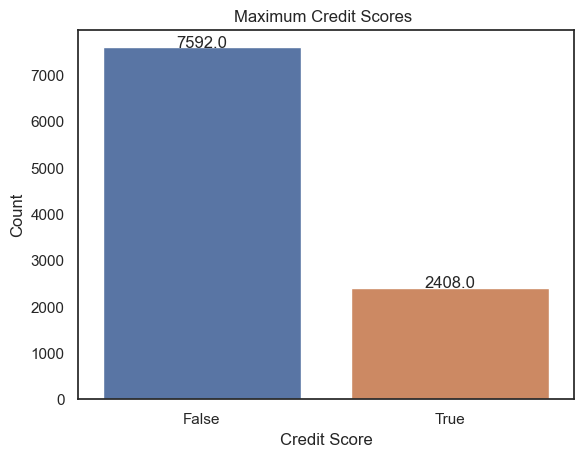

In [11]:
sns.set(style="white") 
ax= sns.countplot(x= max_score) # countplot
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
plt.title('Maximum Credit Scores ')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()

#This graph clearly indicates that 2408 customers have a good credit score, while another 7592 have a low credit score, meaning less than 720


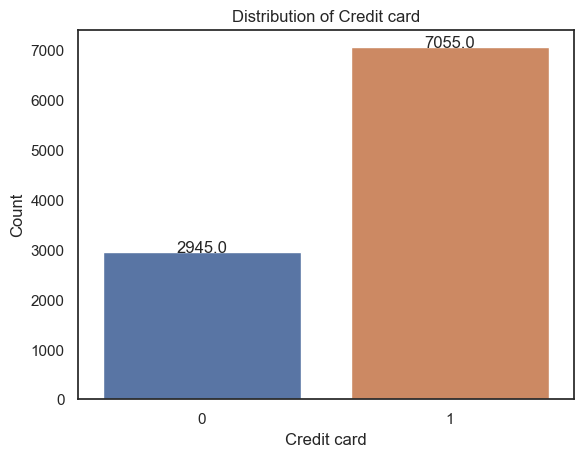

In [12]:
# No of people who have credit card
ax= sns.countplot(x= 'credit_card' ,data= churn_data)
for p in ax.patches:
     ax.annotate(f'{p.get_height()}',(p.get_x() + p.get_width()/2., p.get_height()),ha = 'center' ,va =  'baseline')
plt.title('Distribution of Credit card')
plt.xlabel('Credit card')
plt.ylabel('Count')
plt.show()
plt.show()

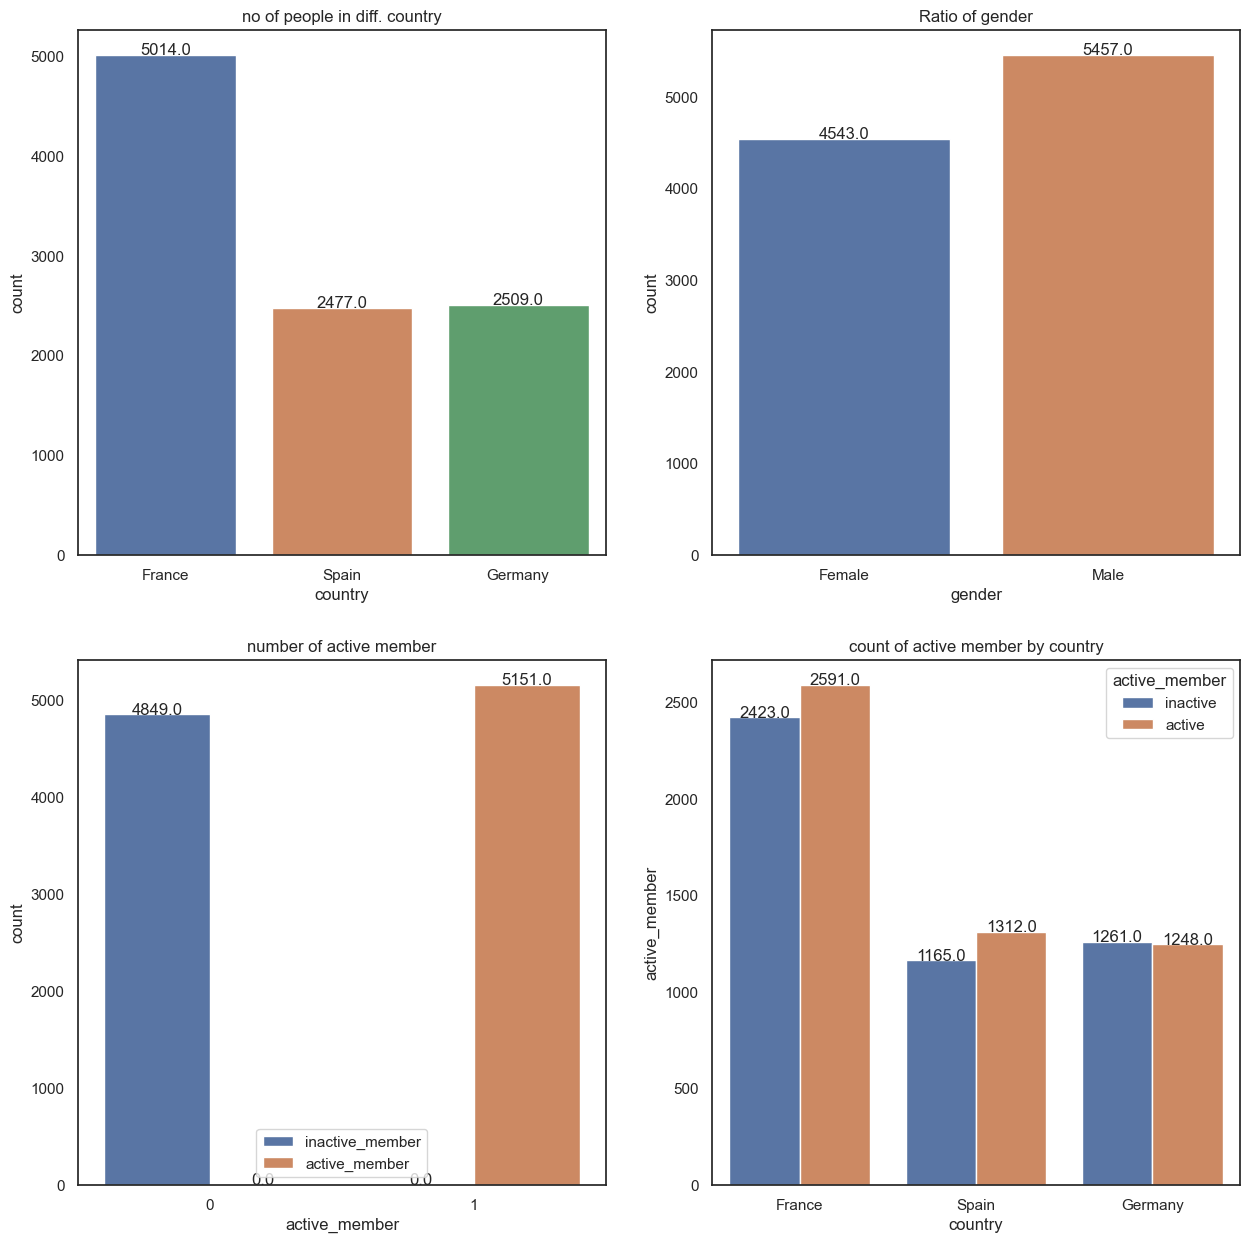

In [13]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
ax = sns.countplot(x= "country",data= churn_data)
plt.title("no of people in diff. country")
for p in ax.patches:
     ax.annotate(f'{p.get_height()}',(p.get_x() + p.get_width()/2., p.get_height()),ha = 'center' ,va =  'baseline')

plt.subplot(2,2,2)
ax= sns.countplot(x= 'gender',data= churn_data)
plt.title("Ratio of gender")
for p in ax.patches:
     ax.annotate(f'{p.get_height()}',(p.get_x() + p.get_width()/2., p.get_height()),ha = 'center' ,va =  'baseline')

plt.subplot(2,2,3)
ax =  sns.countplot(x= 'active_member',data= churn_data,hue= 'active_member')
plt.legend(['inactive_member','active_member'])
plt.title('number of active member')
for p in ax.patches:
     ax.annotate(f'{p.get_height()}',(p.get_x() + p.get_width()/2., p.get_height()),ha = 'center' ,va =  'baseline')
     
plt.subplot(2,2,4)
ax= sns.countplot(x='country',hue = 'active_member',data= churn_data)
plt.xlabel('country')
plt.ylabel('active_member')
plt.title('count of active member by country')
plt.legend(title = 'active_member',labels =['inactive','active'])
for p in ax.patches:
     ax.annotate(f'{p.get_height()}',(p.get_x() + p.get_width()/2., p.get_height()),ha = 'center' ,va =  'baseline')

plt.show()

In [14]:
# Assuming 'churn_data' is your DataFrame
df = churn_data[['country', 'gender']]

# Initialize LabelEncoder
encoder = LabelEncoder()

# Create a copy of the DataFrame
encoder_data = df.copy()

# Apply LabelEncoder to each column
for column in df.columns:
    encoder_data[column] = encoder.fit_transform(df[column])

# Now, 'encoder_data' contains the encoded columns
print(encoder_data)


      country  gender
0           0       0
1           2       0
2           0       0
3           0       0
4           2       0
...       ...     ...
9995        0       1
9996        0       1
9997        0       0
9998        1       1
9999        0       0

[10000 rows x 2 columns]


In [15]:
churn_data[['country','gender']]= encoder_data

In [16]:
churn_data

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [17]:

churn_data = churn_data.drop(columns='customer_id',axis=1)

In [18]:
churn_data

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [19]:
rel =  churn_data.corr()
rel

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
credit_score,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
country,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [20]:
churn_data.dtypes

credit_score          int64
country               int32
gender                int32
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

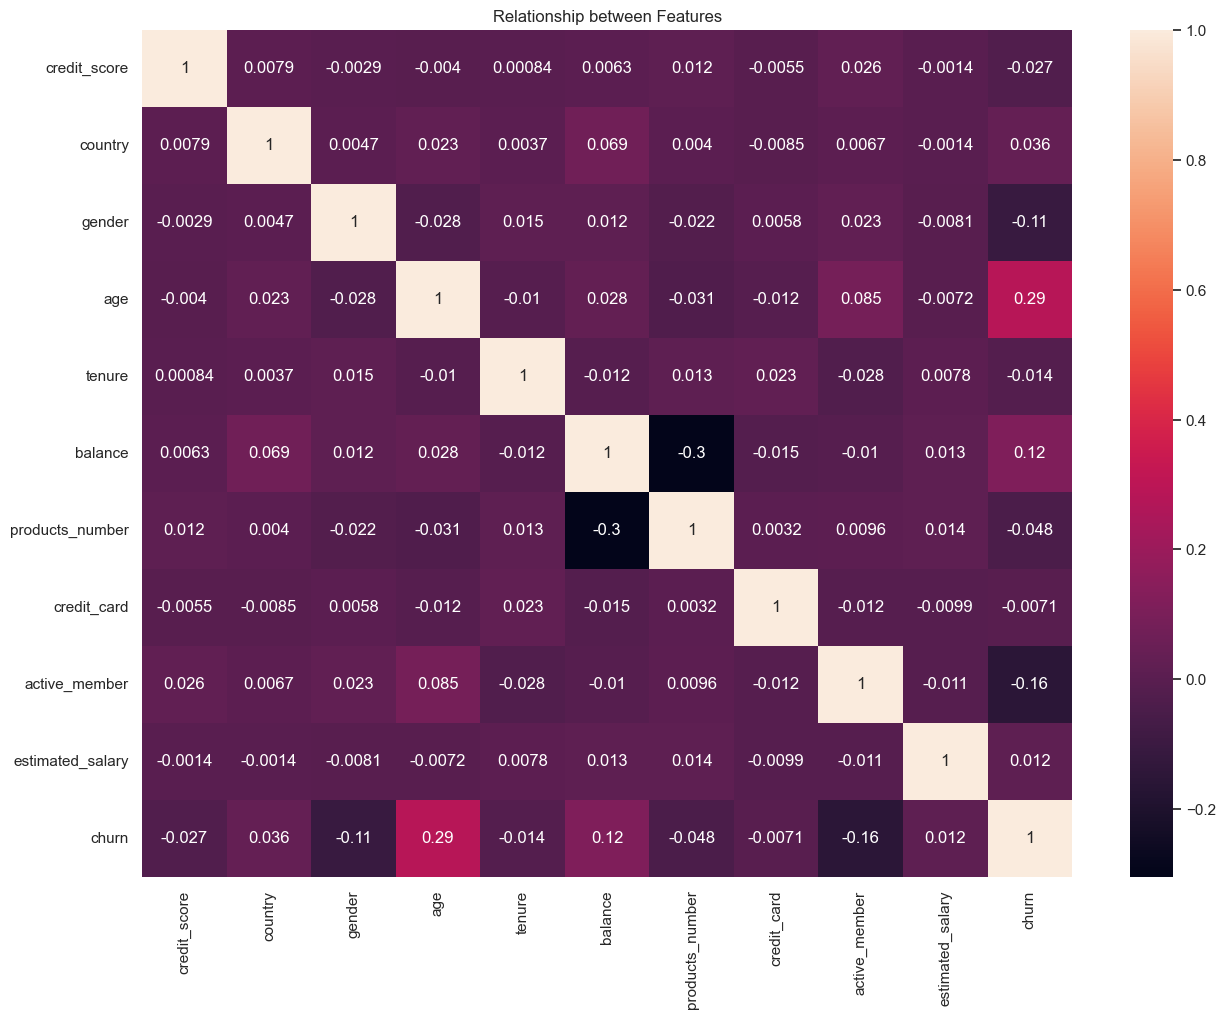

In [21]:
plt.figure(figsize= (15,11))
sns.heatmap(rel,annot=True)
plt.title('Relationship between Features')
plt.show()

In [22]:
x=  churn_data.iloc[:,0:-1]
y = churn_data.iloc[:,-1]


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.2,random_state=30)
print(x_train.shape)

(8000, 10)


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaling  =  MinMaxScaler()
churn_data1 =  scaling.fit(x_train)
X_train =  churn_data1.transform(x_train)
X_test  =  churn_data1.transform(x_test)

In [25]:
churn_data.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

In [26]:
churn_dataa =  pd.DataFrame(X_train,columns=['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary'])

In [27]:
churn_dataa

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,0.630,1.0,1.0,0.270270,0.9,0.000000,0.000000,0.0,1.0,0.437048
1,0.412,0.0,1.0,0.297297,0.5,0.501837,0.000000,1.0,1.0,0.475610
2,0.432,0.0,0.0,0.324324,0.6,0.000000,0.000000,1.0,0.0,0.903539
3,0.622,1.0,0.0,0.135135,0.7,0.380065,0.000000,0.0,0.0,0.511477
4,0.538,0.0,0.0,0.405405,0.4,0.000000,0.000000,0.0,0.0,0.090426
...,...,...,...,...,...,...,...,...,...,...
7995,0.888,1.0,0.0,0.054054,0.4,0.456122,0.000000,1.0,1.0,0.538759
7996,0.404,1.0,1.0,0.364865,0.9,0.000000,0.333333,1.0,0.0,0.133718
7997,0.410,1.0,1.0,0.189189,0.4,0.000000,0.333333,1.0,1.0,0.271997
7998,0.800,1.0,0.0,0.283784,0.7,0.476552,0.000000,1.0,0.0,0.435322


In [28]:
import pickle
scaling_data = pickle.dump(churn_dataa,open('scaling_data.pkl','wb'))

In [29]:
churn_dataa.describe()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,0.600890,0.373500,0.548625,0.281846,0.501675,0.303578,0.177250,0.706875,0.514875,0.503090
std,0.193492,0.413318,0.497661,0.141231,0.288929,0.248633,0.194518,0.455224,0.499810,0.287466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.466000,0.000000,0.000000,0.189189,0.300000,0.000000,0.000000,0.000000,0.000000,0.257652
50%,0.602000,0.000000,1.000000,0.256757,0.500000,0.386342,0.000000,1.000000,1.000000,0.505085
75%,0.736000,0.500000,1.000000,0.351351,0.800000,0.508706,0.333333,1.000000,1.000000,0.748446
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [31]:
model  =  Sequential([
     keras.layers.Dense(15,input_shape= (10,),activation = 'relu'),
     keras.layers.Dense(10,activation = 'relu'),
     keras.layers.Dense(9,activation = 'relu'),
     
     keras.layers.Dense(1,activation = 'sigmoid')
])

In [32]:
model.compile(
     optimizer = 'adam',
     loss = 'BinaryCrossentropy',
     metrics =  ['accuracy']
)
model_history = model.fit(X_train,y_train,epochs=20)


Epoch 1/20


250/250 [==============================] - 2s 2ms/step - loss: 0.4987 - accuracy: 0.7990
Epoch 2/20
250/250 [==============================] - 1s 2ms/step - loss: 0.4687 - accuracy: 0.8009
Epoch 3/20
250/250 [==============================] - 1s 2ms/step - loss: 0.4518 - accuracy: 0.8066
Epoch 4/20
250/250 [==============================] - 1s 2ms/step - loss: 0.4391 - accuracy: 0.8136
Epoch 5/20
250/250 [==============================] - 1s 2ms/step - loss: 0.4323 - accuracy: 0.8159
Epoch 6/20
250/250 [==============================] - 1s 2ms/step - loss: 0.4288 - accuracy: 0.8151
Epoch 7/20
250/250 [==============================] - 1s 2ms/step - loss: 0.4232 - accuracy: 0.8192
Epoch 8/20
250/250 [==============================] - 1s 2ms/step - loss: 0.4181 - accuracy: 0.8242
Epoch 9/20
250/250 [==============================] - 1s 2ms/step - loss: 0.4080 - accuracy: 0.8304
Epoch 10/20
250/250 [==============================] - 1s 2ms/step - loss: 0.3968 - accuracy: 0.8

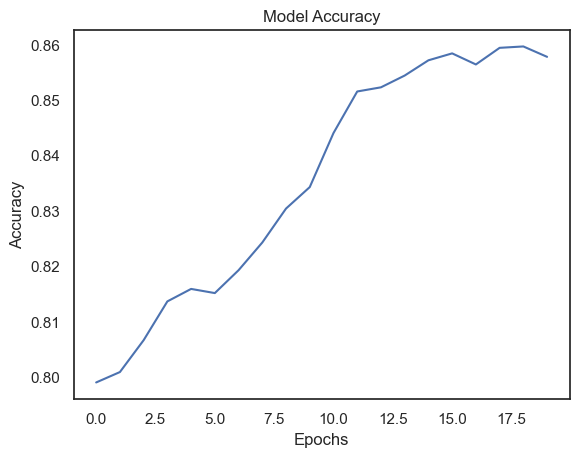

In [33]:


plt.plot(model_history.history['accuracy'])  # Plots the accuracy values from the model's history
plt.title('Model Accuracy')  # Sets the title of the plot
plt.ylabel('Accuracy')  # Sets the label for the y-axis
plt.xlabel('Epochs')  # Sets the label for the x-axis
plt.show()  # Displays the plot


In [34]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3771 - accuracy: 0.8435


[0.3770638704299927, 0.843500018119812]

In [35]:
y_pred  =  model.predict(x_test)

63/63 [==============================] - 0s 2ms/step


In [36]:
y_pred

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [37]:
yp = []
for i in y_pred:
     if i >0.5:
          yp.append(1)
     else:
          yp.append(0)

In [38]:
yp[:10]

[1, 1, 1, 0, 1, 0, 0, 0, 1, 1]

In [39]:
y_test[:10]

8793    0
1122    1
1283    0
9318    0
7765    0
3011    0
7125    0
8823    0
3121    0
9314    1
Name: churn, dtype: int64

In [40]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(yp,y_test))

              precision    recall  f1-score   support

           0       0.51      0.82      0.63       969
           1       0.61      0.26      0.36      1031

    accuracy                           0.53      2000
   macro avg       0.56      0.54      0.50      2000
weighted avg       0.56      0.53      0.49      2000



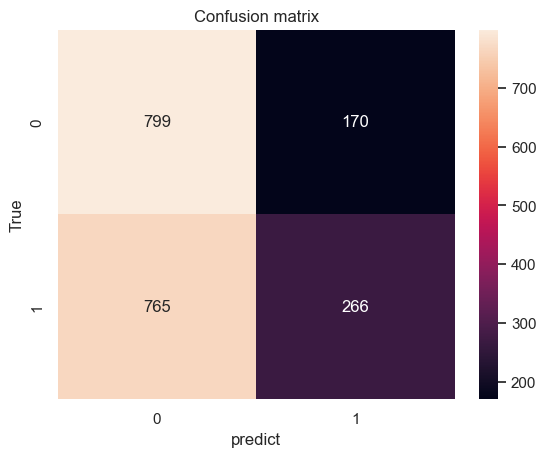

In [41]:
cm  =  confusion_matrix(yp,y_test)
sns.heatmap(cm,annot=True,fmt= 'd')
plt.xlabel('predict')
plt.ylabel('True')
plt.title('Confusion matrix')
plt.show()

In [42]:
row =churn_data.iloc[0]
row

credit_score           619.00
country                  0.00
gender                   0.00
age                     42.00
tenure                   2.00
balance                  0.00
products_number          1.00
credit_card              1.00
active_member            1.00
estimated_salary    101348.88
churn                    1.00
Name: 0, dtype: float64

In [43]:
Ann_model = model.predict([[0.63, 1.0, 1.0, 0.27027027, 0.9, 0.0, 0.0, 0.0, 1.0, 0.43704754]])
Ann_model

1/1 [==============================] - 0s 126ms/step


array([[0.08299498]], dtype=float32)

In [44]:
import pickle

In [45]:
pickle.dump(Ann_model,open('Ann_model.pkl','wb'))

In [46]:
pickle_model =  pickle.load(open('Ann_model.pkl','rb'))